![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [66]:
import pandas as pd
from pandasql import sqldf

df = pd.read_csv('students.csv')
query = """
        SELECT *
        FROM df;
        """

#  SQL query execution
result_df = sqldf(query, locals())
result_df

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,247,None,None,None,None,None,None,None,None,None


In [74]:
#Count of international and domestic students
df1 = pd.read_csv('students.csv')
query = """
        Select inter_dom , count(inter_dom)  AS count_inter_dom from df1 group by inter_dom
        order by count_inter_dom desc ;
        """

result_df1 = sqldf(query, locals())
result_df1

,inter_dom,count_inter_dom
0,Inter,201
1,Dom,67
2,None,0


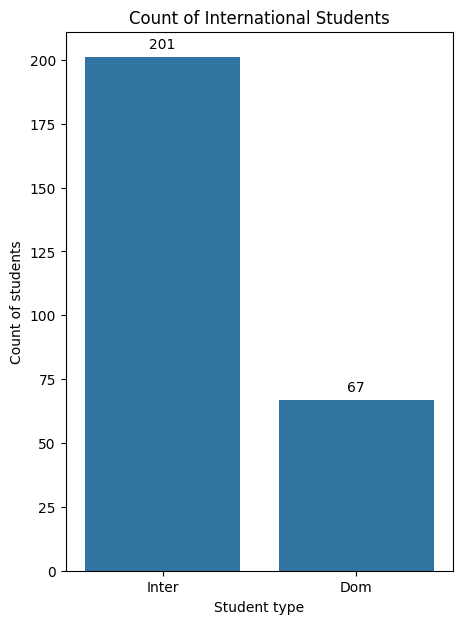

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
#Bar chart for students count
plt.figure(figsize=(5, 7))
ax = sns.barplot(x='inter_dom', y='count_inter_dom', data=result_df1)

#for data label display on chart
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
# Labels and title
plt.xlabel('Student type')
plt.ylabel('Count of students')
plt.title('Count of International Students')

# Display chart
plt.show()

In [78]:
''' Explore the `students` data using PostgreSQL to 
find out if you would come to a similar conclusion for international students and 
see if the length of stay is a contributing factor.
'''

query = """
        select stay as Stay_Years, count(inter_dom) as count_int, 
        round(avg(todep),2) as average_phq, 
        round(avg(tosc),2) as average_scs, 
        round(avg(toas),2) as average_as
        from df
        where inter_dom = 'Inter'  group by Stay_Years order by stay desc;
        """

# Execute above sql query
result_df = sqldf(query, locals())
result_df

,Stay_Years,count_int,average_phq,average_scs,average_as
0,10.0,1,13.00,32.00,50.00
1,8.0,1,10.00,44.00,65.00
2,7.0,1,4.00,48.00,45.00
3,6.0,3,6.00,38.00,58.67
4,5.0,1,0.00,34.00,91.00
5,4.0,14,8.57,33.93,87.71
6,3.0,46,9.09,37.13,78.00
7,2.0,39,8.28,37.08,77.67
8,1.0,95,7.48,38.11,72.80


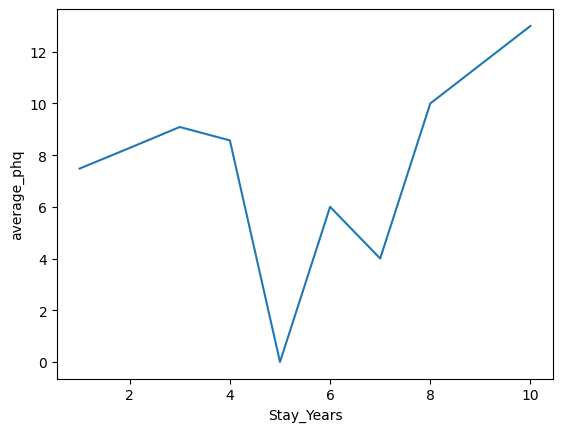

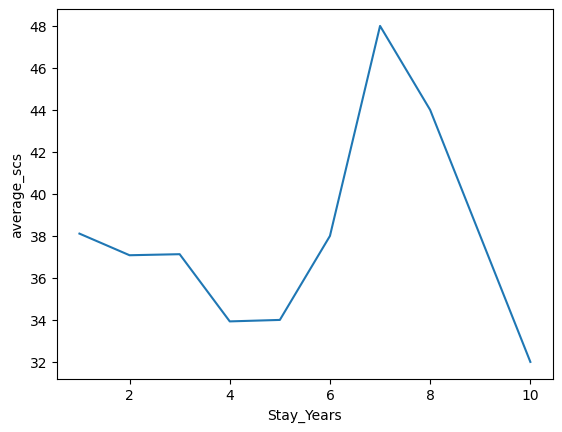

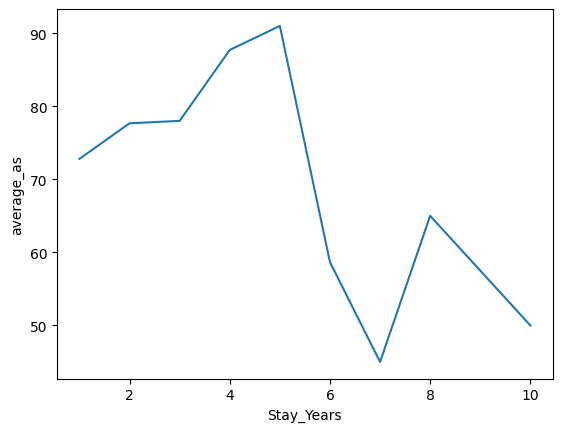

In [79]:

# Graph for Stay of years Vs average_phq
sns.lineplot(data=result_df, x='Stay_Years', y='average_phq')
plt.show()

# Graph for Stay of years Vs average_scs
sns.lineplot(data=result_df, x='Stay_Years', y='average_scs')
plt.show()

# Graph for Stay of years Vs average_as
sns.lineplot(data=result_df, x='Stay_Years', y='average_as')
plt.show()


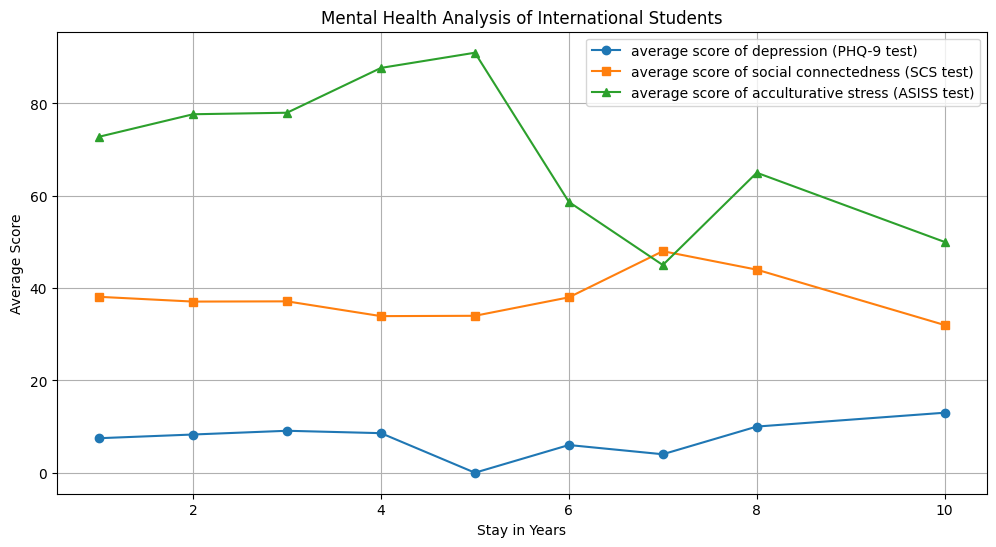

In [81]:
#Graph comparing Years of stay and all 3 scores combined
plt.figure(figsize=(12, 6)) 
# Plotting
plt.plot(result_df['Stay_Years'], result_df['average_phq'], marker='o', label='average score of depression (PHQ-9 test)')
plt.plot(result_df['Stay_Years'], result_df['average_scs'], marker='s', label='average score of social connectedness (SCS test)')
plt.plot(result_df['Stay_Years'], result_df['average_as'], marker='^', label='average score of acculturative stress (ASISS test)')

# labels and legend
plt.xlabel('Stay in Years')
plt.ylabel('Average Score')
plt.title('Mental Health Analysis of International Students')
plt.legend()
plt.grid(True)
plt.show()